## K - Nearest Neighbours
- A type of supervised learning
- We make clusters, according to distances from known values
- And mark all the datapoints in these clusters as the same label

### Example:
- Lets say we have coconuts and watermelons
- We plot all the sizes of every coconut and watermelon we ever held
- We can observe that coconuts will lie in the range of $7 - 15cm$
- Watermelons will lie in range of $25 - 30cm$

Now, if we get a fruit of the size 27cms, we can safely assume that it is a watermelon as it is closer to all the watermelons as it is to the coconuts

For a new dataset, we compare the K nearest data points and check their labels, the most similar is found and the label is applied to the data point

Similarly for a 2D dataset, we calculate the nearness by distance formula
$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

#### Trying it out

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [52]:
X = pd.read_csv("x_data.csv", header=None)
X = X.drop(columns=[0])
X.head()

,1,2
0,3.482106,2.420392
1,3.516279,3.719750
2,4.606496,3.414379
3,4.677011,3.047244
4,4.157725,3.138677


In [53]:
Y = pd.read_csv("y_data.csv", dtype="int32", header=None)
Y = Y.drop(columns=[0])
Y.head()

,1
0,0
1,0
2,0
3,0
4,0


In [54]:
print(X.shape, Y.shape)

(400, 2) (400, 1)


In [55]:
x_data, y_data = X.values, Y.values

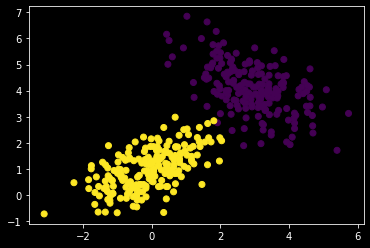

In [56]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data.reshape(-1))
plt.show()

We see how the datasets are present

In [57]:
# Defining the distance formula
def distance(p1, p2):
    return((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

#### Implementing KNN Classifier

In [74]:
class KNNClassifier:

    def __init__(self, k = 5):
        self.k = k

    def fit(self, x, y):    # Fits the values in our model
        self.x = x
        self.y = y

    def predict(self, p):    # p is a point
        
        kNearestDistances = np.array(sorted([[distance(self.x[i], p), self.y[i]] for i in range(len(self.x))])[1:self.k+1])
        
        values, count = np.unique(kNearestDistances[:, 1], return_counts=True)

        predictedClass = values[np.argmax(count)]

        return {"class": int(predictedClass), "prob": np.max(count)/np.sum(count)}


Trying out our custom KNN classifier

In [75]:
knn_model = KNNClassifier()
knn_model.fit(x_data, y_data.reshape(-1))

knn_model.predict(x_data[0])

{'class': 0, 'prob': 1.0}

In [76]:
# And to check
y_data[0]

array([0], dtype=int32)

We can see that the results are consistent

#### Breaking in test train split

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.reshape(-1), test_size=0.2)
print(x_train, y_train)

[[ 1.02609944  6.849884  ]
 [-1.75242778  1.12996124]
 [ 0.5073436   5.9192382 ]
 [-0.17874325  1.20829439]
 [ 3.32667479  3.8889612 ]
 [-0.76031838  1.33444967]
 [ 2.34153881  2.47311439]
 [-0.43366679 -0.03749477]
 [ 3.17307768  3.69712075]
 [-0.96562169  1.54263818]
 [ 2.20697823  4.70994226]
 [ 3.07424214  5.0737755 ]
 [ 2.73714175  3.32335845]
 [ 3.76579189  4.2561859 ]
 [ 3.09839038  3.35192483]
 [ 0.9245533   5.63827035]
 [-1.64871436  0.09975032]
 [ 2.90766062  3.47571456]
 [ 0.39442622  1.62842925]
 [ 0.93441431  2.50514637]
 [ 1.77674247  5.05791677]
 [ 4.53045005  4.19310798]
 [ 0.43581707  6.15985984]
 [-0.09475031  0.78098366]
 [ 0.17172657  2.18030806]
 [-0.01384928  2.15466352]
 [ 3.82434023  4.33027249]
 [ 3.84711149  5.19598101]
 [ 2.20999864  3.8340588 ]
 [ 0.66997303  0.82487352]
 [ 1.07329112  2.31620201]
 [ 3.2447355   2.49239435]
 [-0.02490438  0.75287958]
 [ 0.00717591  0.53080432]
 [-0.35276782  0.13646095]
 [ 2.45409694  3.62006999]
 [-0.99230651  0.83544424]
 

In [79]:
knn_model.fit(x_train, y_train)

In [80]:
predictions = []

for x in x_test:
    predictions.append(knn_model.predict(x))

predictions

[{'class': 0, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 0.6},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 0.6},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 1, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 0, 'prob': 1.0},
 {'class': 0, 'prob'

In [82]:
predictions = []

for x in x_test:
    predictions.append(knn_model.predict(x)["class"])

To check how consistent our results are, we compare this with `y_test`

In [83]:
predictions == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

For a better metric

In [84]:
np.mean(predictions == y_test)

0.9875

#### Our accuracy comes out to be $\approx 99\%$